[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nepal-College-of-Information-Technology/AI-Data-Science-Workshop-2024/blob/main/Day%2005%3A%20Introduction%20to%20Machine%20Learning/Part3_k-Nearest_Neighbors.ipynb)


# k-Nearest Neighbors (k-NN)

In this notebook, we will explore the k-Nearest Neighbors (k-NN) algorithm using Scikit-learn. We will use a simple dataset to classify flowers. This is a beginner-friendly introduction to how k-NN works.

---

## 1. What is k-Nearest Neighbors (k-NN)?

**k-Nearest Neighbors (k-NN)** is an algorithm that helps us figure out what category something belongs to by looking at the "neighbors" around it. Think of it like asking your nearby friends for advice and going with what most of them suggest.

### Example:
If you want to know if someone likes action movies, ask three of their closest friends (k = 3). If two of them like action movies, it's likely that the person also does!

---

## 2. How Does k-NN Work?

1. **Pick a number** (k) to decide how many "neighbors" to ask.
2. For each new point (e.g., a flower):
   - Look at the closest k neighbors.
   - Check what categories (e.g., type of flower) they belong to.
   - Take a "vote": whichever category appears most is the one we'll predict for the new point.

### Real-World Use Cases:
- **Movie Recommendations**: Based on what similar users liked.
- **Identifying Flowers**: Based on known measurements of other flowers.

---

## 3. Let's Get Started!

We'll use a simple dataset: the **Iris dataset**, which has information about different types of flowers.

We’ll answer the question: **Can we predict the type of flower based on measurements like petal length and width?**

### Import the Required Libraries

In [22]:
# Importing the necessary tools for k-NN
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from sklearn.datasets import load_iris  # A dataset with flower data
from sklearn.model_selection import train_test_split  # To split data for training/testing
from sklearn.neighbors import KNeighborsClassifier  # The k-NN algorithm
from sklearn.metrics import accuracy_score  # To check how good our model is

## 4. Load the Data

About the Iris Dataset

The **Iris dataset** is one of the most famous datasets in machine learning. It contains information about three different types of flowers:
- **Setosa**
- **Versicolour**
- **Virginica**
![Iris Dataset](dataset/iris_dataset.png)

For each flower, four measurements are given:
- **Sepal length** (in cm)
- **Sepal width** (in cm)
- **Petal length** (in cm)
- **Petal width** (in cm)

Our goal is to classify the flowers based on these measurements.

In [23]:
# Load the iris dataset
iris = load_iris()
X = iris.data  # The measurements (features)
y = iris.target  # The type of flower (0 = Setosa, 1 = Versicolour, 2 = Virginica)

# Let's see what the data looks like
print("Features (measurements):\n", X[:5])  # First 5 rows of features
print("Labels (flower types):\n", y[:5])  # First 5 rows of target (labels)

Features (measurements):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Labels (flower types):
 [0 0 0 0 0]


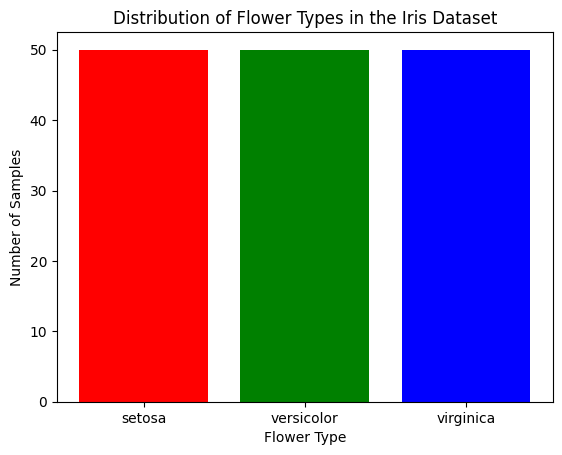

In [24]:
# Get the distribution of each class (Setosa, Versicolour, Virginica)
labels, counts = np.unique(y, return_counts=True)

# Create a bar chart for the distribution of flower types
plt.bar(iris.target_names, counts, color=['red', 'green', 'blue'])
plt.title('Distribution of Flower Types in the Iris Dataset')
plt.xlabel('Flower Type')
plt.ylabel('Number of Samples')
plt.show()

## 5. Splitting the Dataset

We will split the dataset into two parts:

  - Training data: This is used to teach the model.
  - Testing data: This is used to test how well the model learned.

In [25]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 120
Testing data size: 30


## 6. Train the k-NN Classifier

Now, we will train the k-NN model using the training data. We’ll set k = 3, which means the model will look at the 3 closest neighbors to make a prediction.

In [26]:
# Create the k-NN classifier with k=3 (3 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

print("Model trained!")

Model trained!


## 8. Make Predictions

Now that the model is trained, we can make predictions on the test data and see how well it performs.

In [27]:
# Predict the flower type for the test data
y_pred = knn.predict(X_test)

print("Predictions:  ", y_pred)
print("Actual labels:", y_test)

Predictions:   [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual labels: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Test with your data for making prediction

In [28]:
# Ask user for input parameters
sepal_length = float(input("Enter sepal length (in cm): "))
sepal_width = float(input("Enter sepal width (in cm): "))
petal_length = float(input("Enter petal length (in cm): "))
petal_width = float(input("Enter petal width (in cm): "))

# Create a numpy array with the input values
user_input = np.array([[sepal_length, sepal_width, petal_length, petal_width]])

# Make a prediction using the trained k-NN model
user_prediction = knn.predict(user_input)

# Map the prediction to the corresponding flower name
predicted_flower = iris.target_names[user_prediction][0]

print(f"The predicted flower type is: {predicted_flower}")

The predicted flower type is: virginica


## 9. Evaluate the Model

Let’s check how accurate our model is by comparing the predicted flower types to the actual ones.

In [29]:
# Calculate accuracy: the percentage of correct predictions
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


## 10. Try with Different Values of k

The number k (the number of neighbors) can affect how well the model works. Try changing k to see if it improves the accuracy!

In [30]:
# Try with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=5: {accuracy * 100:.2f}%")

Accuracy with k=5: 100.00%


In this notebook, we learned about the k-Nearest Neighbors (k-NN) algorithm. We trained a model to classify flowers based on measurements, and we saw how changing the number of neighbors (k) can impact the accuracy.

We also visualized the distribution of the different flower types in the Iris dataset using a bar chart.

You can try this on different datasets and explore more ways to use k-NN for other tasks like recommendation systems, image recognition, and more!

---